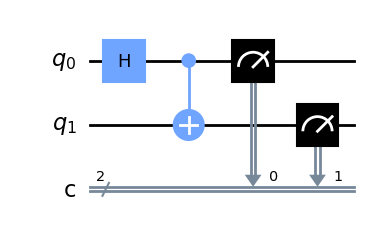

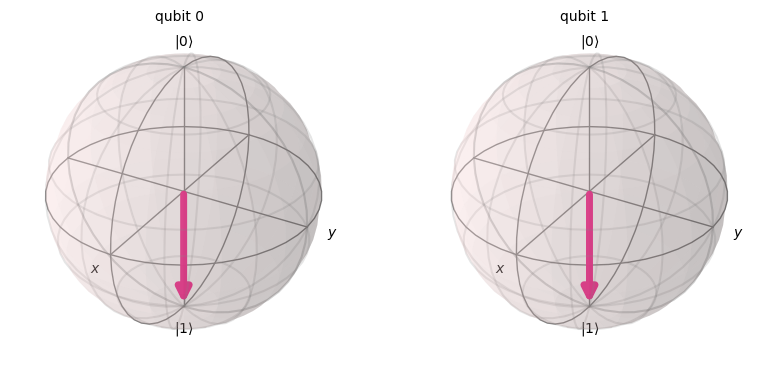


Measurement Results: {'00': 520, '11': 504}



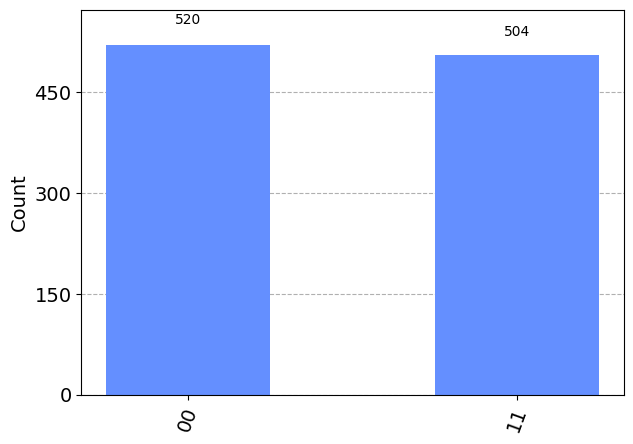

In [1]:
#-------------------------------------------------------------------------
# 2-qubit entanglement circuit
# Chapter 3 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#-------------------------------------------------------------------------
from qiskit import QuantumCircuit  as QC
from qiskit import QuantumRegister as QR

from qiskit import ClassicalRegister as CR

from qiskit import Aer
from qiskit import execute

from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector

#-------------------------------------------------------------------------
def get_state_vector(qc):
    """ Execute the circuit and get the state vector """
    backend = Aer.get_backend('statevector_simulator')
    result  = execute(qc, backend).result()
    state_vector = result.get_statevector()
    
    return state_vector

#-------------------------------------------------------------------------
def display_bloch(qc):
    """ Plots Bloch Sphere for the quantum circuit qc """
    #(c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas
        
    # Execute the circuit and get the state vector
    state_vector = get_state_vector(qc)
    
    # Draw the circuit
    display(circuit_drawer(qc, output='mpl', style="iqp"))
    
    # Plot Bloch sphere for the entire system
    display(plot_bloch_multivector(state_vector) )
    
    return

#-------------------------------------------------------------------------

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QC(2, 2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the Circuit and the Bloch Sphere
display_bloch(qc)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()

# Now print the measurements for qubit "00" and qubit "11"
# Note that the simulator ran the noperations 1024 times.
# Therefore, the probability is the count / 1024
print()
print("Measurement Results:", result.get_counts())
print()

# Now plot the probabilities for qubit "00" and qubit "11"
plot_histogram(result.get_counts())


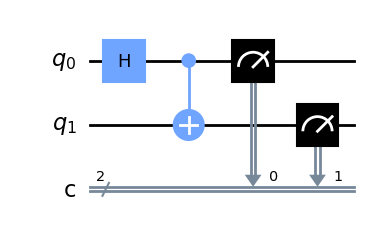

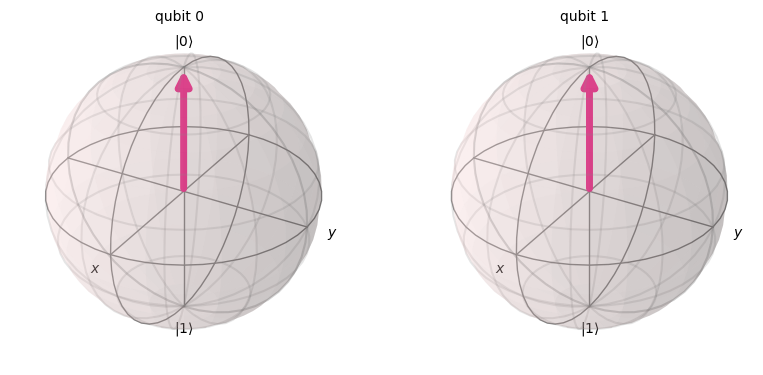


Measurement Results: {'11': 492, '00': 532}



<Figure size 3600x2400 with 0 Axes>

In [2]:
#-------------------------------------------------------------------------
# 2-qubit entanglement circuit
# Chapter 3 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
# Version with higher quality figures using higher DPI to draw circuit and Bloch spheres
#-------------------------------------------------------------------------
# Version 1.1
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#-------------------------------------------------------------------------
from qiskit import QuantumCircuit as QC
from qiskit import QuantumRegister as QR
from qiskit import ClassicalRegister as CR
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer, plot_state_qsphere, plot_bloch_multivector

#-------------------------------------------------------------------------
def get_state_vector(qc):
    """ Execute the circuit and get the state vector """
    backend = Aer.get_backend('statevector_simulator')
    result  = execute(qc, backend).result()
    state_vector = result.get_statevector()
    
    return state_vector

#-------------------------------------------------------------------------
def display_bloch(qc, figsize_circuit=(14, 10), figsize_bloch=(9, 9), dpi=300):
    """
    Plots the quantum circuit and Bloch Sphere with specified figure size and DPI.
    
    Parameters:
    - qc: QuantumCircuit object
    - figsize_circuit: Tuple specifying the figure size for the circuit
    - figsize_bloch: Tuple specifying the figure size for the Bloch sphere
    - dpi: Resolution of the figures
    """
    #(c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas
        
    # Execute the circuit and get the state vector
    state_vector = get_state_vector(qc)
    
    # ----------------------------
    # Draw the Quantum Circuit
    # ----------------------------
    # Create a new figure with specified size and DPI
    plt.figure(figsize=figsize_circuit, dpi=dpi)
    
    # Generate the circuit drawer figure
    circuit_fig = circuit_drawer(qc, output='mpl', style="iqp")
    
    # Display the circuit
    display(circuit_fig)
    
    # Close the figure to prevent duplication in some environments
    plt.close()
    
    # ----------------------------
    # Plot the Bloch Sphere
    # ----------------------------
    # Create a new figure for the Bloch sphere with specified size and DPI
    plt.figure(figsize=figsize_bloch, dpi=dpi)
    
    # Generate the Bloch sphere plot
    bloch_fig = plot_bloch_multivector(state_vector)
    
    # Display the Bloch sphere
    display(bloch_fig)
    
    # Close the figure to prevent duplication
    plt.close()
    
    return

#-------------------------------------------------------------------------
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QC(2, 2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# ----------------------------
# Draw the Circuit and the Bloch Sphere with Higher Quality
# ----------------------------
display_bloch(qc, dpi=600)

# ----------------------------
# Simulate the Circuit
# ----------------------------
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()

# ----------------------------
# Print the Measurement Results
# ----------------------------
print("\nMeasurement Results:", result.get_counts())
print()

# ----------------------------
# Plot the Measurement Probabilities with Enhanced Quality
# ----------------------------
# Increase the figure size and DPI for the histogram
plt.figure(figsize=(12, 8), dpi=300)
plot_histogram(result.get_counts(), title="Measurement Results for 2-Qubit Entangled State")
plt.show()
